# Matplotlib의 여러가지 플롯

In [2]:
# 항상 초기화
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='Malgun Gothic')

## 바 차트

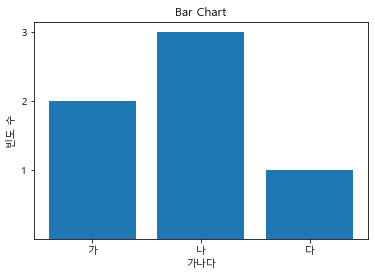

In [2]:
y = [2, 3, 1]
x = np.arange(len(y))
xlabel = ['가', '나', '다']
plt.title("Bar Chart")
plt.bar(x, y)
plt.xticks(x, xlabel)
plt.yticks(sorted(y))
plt.xlabel("가나다")
plt.ylabel("빈도 수")
plt.show()

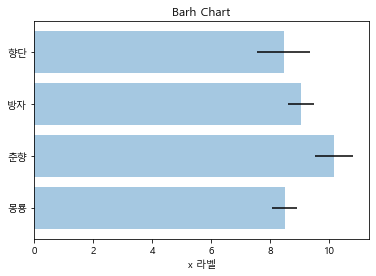

In [3]:
# xerr 인수나 yerr인수를 지정하면 에러바(error bar)를 추가할 수 있다.
np.random.seed(0)

people = ['몽룡','춘향','방자','향단']
y_pos = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

plt.title("Barh Chart")
plt.barh(y_pos, performance, xerr=error, alpha=0.4)
plt.yticks(y_pos, people)
plt.xlabel('x 라벨')
plt.show()

## 타이타닉 선실별 승객수

In [26]:
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [17]:
s = titanic['class'].value_counts()
s

Third     491
First     216
Second    184
Name: class, dtype: int64

In [23]:
df = titanic[['class','pclass']].count()
df

class     891
pclass    891
dtype: int64

In [25]:
df = titanic[['class','pclass']].groupby('class').count()
df

,pclass
class,
First,216
Second,184
Third,491


In [30]:
# 함수 확인
s.values, s.index.to_list()

(array([491, 216, 184], dtype=int64), ['Third', 'First', 'Second'])

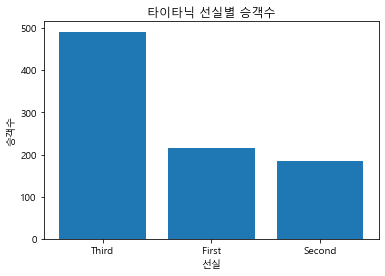

In [28]:
y = s.values
x = np.arange(len(y))
xlabel = s.index.to_list()

plt.title('타이타닉 선실별 승객수')
plt.bar(x, y)
plt.xticks(x, xlabel)
plt.xlabel('선실')
plt.ylabel('승객수')
plt.show()

In [33]:
# 함수 확인
df.pclass.values, np.arange(len(y))

(array([216, 184, 491], dtype=int64), array([0, 1, 2]))

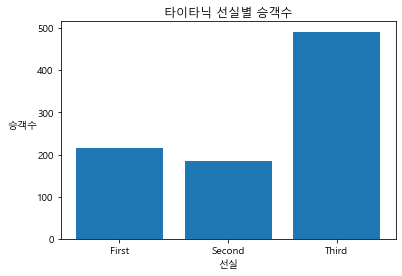

In [38]:
y = df.pclass.values
x = np.arange(len(y))
xlabel = df.index.to_list()

plt.title('타이타닉 선실별 승객수')
plt.bar(x, y)
plt.xticks(x, xlabel)
plt.xlabel('선실')
plt.ylabel('승객수', rotation=0, labelpad=15)  # rotation과 labelpad는 모두 '승객수'의 옵션
plt.show()

## 스템 플롯
- 이산확률함수나 자기상관관계를 묘사할 때 사용

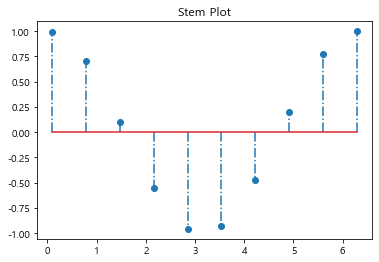

In [4]:
x = np.linspace(0.1, 2 * np.pi, 10) # 0.1-(3.14*2)까지 x축을 10등분
plt.title("Stem Plot")
plt.stem(x, np.cos(x), '-.')
plt.show()

## 파이 차트
- 카테고리 별 값의 상대적인 비교를 위해 pie 차트를 쓴다

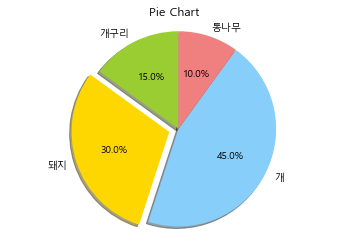

In [7]:
labels = ['개구리','돼지','개','통나무']
sizes = [15, 30, 45, 10]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
explode = (0, 0.1, 0, 0)  # 파이가 떼내어진 정도
plt.title("Pie Chart")
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.show()

## 히스토그램

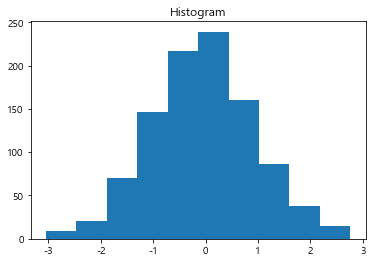

In [44]:
np.random.seed(0)
x = np.random.randn(1000)
plt.title("Histogram")
arrays, bins, patches = plt.hist(x, bins=10) # bins는 arrays사이의 구간을 10개로 한다는 의미

plt.show()

In [45]:
bins # arrays 원소들의 구간 첫시작에서 끝이 10개 반복

array([-3.04614305, -2.46559324, -1.88504342, -1.3044936 , -0.72394379,
       -0.14339397,  0.43715585,  1.01770566,  1.59825548,  2.1788053 ,
        2.75935511])

In [46]:
arrays

array([  9.,  20.,  70., 146., 217., 239., 160.,  86.,  38.,  15.])

## 산점도(Scatter Plot)
- 두 개의 실수 데이터 집합의 상관관계를 살펴볼 때 사용

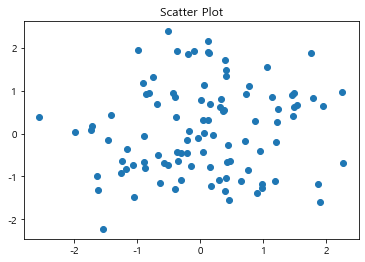

In [3]:
np.random.seed(0)
X = np.random.normal(0, 1, 100)
Y = np.random.normal(0, 1, 100)
plt.title("Scatter Plot")
plt.scatter(X, Y)
plt.show()

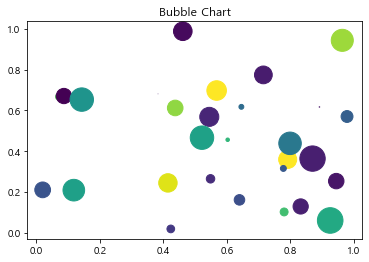

In [4]:
# 데이터가 2차원이 아닌 3차원 혹은 4차원인 경우,
# 크기는 s, 색깔은 c
N = 30
np.random.seed(0)
x = np.random.rand(N)
y1 = np.random.rand(N)
y2 = np.random.rand(N)
y3 = np.pi * (15 * np.random.rand(N))**2
plt.title("Bubble Chart")
plt.scatter(x, y1, c=y2, s=y3)
plt.show()

Anscombe's Quartet
- 선형회귀선: y = 3.0 + 0.5*x

In [5]:
import seaborn as sns
ans = sns.load_dataset('anscombe')
ans.shape

(44, 3)

In [55]:
ans.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [57]:
ans.groupby('dataset').describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

- Dataset I에 대해 산점도와 회귀선 그리기

In [7]:
ds1 = ans[ans.dataset == 'I']
ds1

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


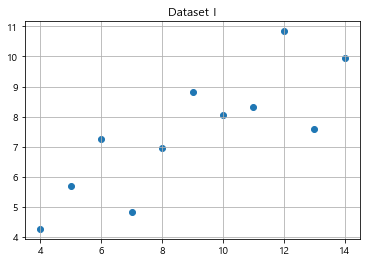

In [8]:
plt.scatter(ds1.x, ds1.y)
plt.grid()
plt.title('Dataset I')
plt.show()

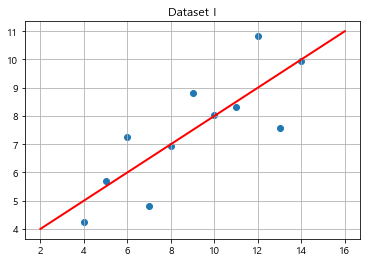

In [9]:
plt.scatter(ds1.x,ds1.y)
plt.plot([2, 16], [4, 11], c='r', lw=2)
plt.grid()
plt.title('Dataset I')
plt.show()

- 4개의 데이터셋 모두에 대해서 그림

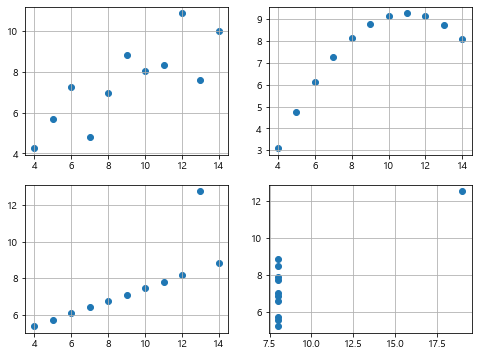

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(8,6))

for i, roman in enumerate(['I', 'II', 'III', 'IV']):
    ds = ans[ans.dataset == roman]          # roman은 'IV'이다
    ax = axes[i//2, i%2]
    ax.scatter(ds.x, ds.y)
    ax.grid()
plt.show()

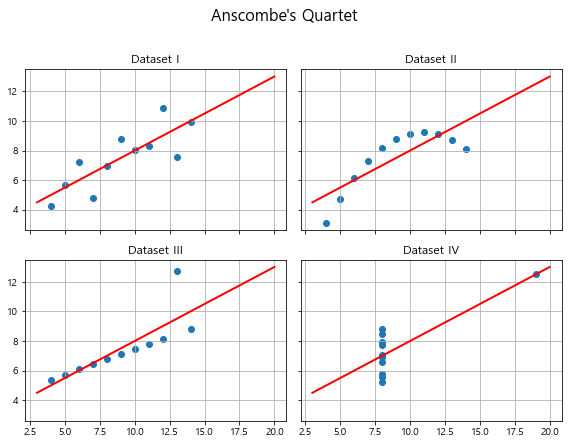

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(8, 6),
                        sharex=True, sharey=True)

for i, roman in enumerate(['I','II','III','IV']):
    ds = ans[ans.dataset == roman]
    ax = axes[i//2, i%2]
    ax.scatter(ds.x, ds.y)
    ax.plot([3, 20],[4.5,13], 'r-', lw=2)
    ax.set_title(f'Dataset {roman}')
    ax.grid()

fig.suptitle("Anscombe's Quartet", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

In [20]:
sns.load_dataset('anscombe')

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


## Imshow

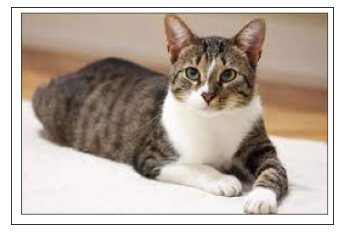

In [23]:
import matplotlib.image as img

image = img.imread('cat.jfif')
plt.imshow(image)
plt.xticks([])
plt.yticks([])
plt.show()


In [24]:
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.images[0]
X

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [26]:
digits.images.shape

(1797, 8, 8)

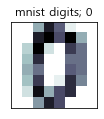

In [36]:
# 데이터수치를 색으로 바꾸는 함수 cmap
plt.title("mnist digits; 0")
plt.imshow(X, interpolation='nearest', cmap=plt.cm.bone_r)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.subplots_adjust(left=0.35, right=0.65, bottom=0.35, top=0.65)
plt.show()

## Box Plot

In [38]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
